# Proyek UAS PMDPM

<b>Harap jangan menghapus cell dan komentar yang diberikan!</b>

Setiap cell markdown dan code akan berisi instruksi pengerjaan Proyek UAS PMDPM

Dalam notebook ini Anda akan diminta untuk membuat sebuah proyek Pembelajaran Mesin menggunakan dataset yang sudah disediakan. Proyek akan terdiri dari proses inisialisasi, data loading, data cleansing, feature engineering, modelling dan evaluasi model. Pada bagian akhir silahkan berikan laporan singkat dari proyek yang sudah dikerjakan

## Penjelasan Tugas

Terapkan pemrosesan dataset dari loading, data cleansing (jika perlu), data scaling, feature selection, hingga evaluasi model secara sederhana menggunakan code yang sudah dipelajari dalam latihan-latihan dan tugas.

### Inisialisasi

Bagian berikut berisi import library yang dibutuhkan

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Loading

Bagian berikut berisi proses data loading (boleh dengan file upload atau dengan mount drive), jangan lupa tampilkan 20 baris data teratas!

In [136]:
#loading data yang akan diolah
data = pd.read_csv('paris_housing2000.csv')
data.head(20)

,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,3,4,1995,N,Y,3114,1258,264,Y,9,10313.5,Basic
1,9,1,2011,N,Y,9390,6219,922,N,9,13229.1,Basic
2,1,4,2003,Y,N,2239,2795,951,Y,7,14431.3,Basic
3,6,2,1990,N,N,6861,5769,442,N,5,15488.0,Basic
4,6,9,1992,Y,Y,6618,7045,939,Y,10,16799.2,Basic
5,5,2,2010,Y,N,4426,5336,911,N,4,17071.0,Basic
6,4,3,1990,Y,N,6022,8521,391,Y,3,17363.0,Basic
7,6,3,2000,N,N,2325,6230,536,N,9,18985.0,Basic
8,2,2,2020,N,Y,8598,3119,268,N,10,19638.0,Basic
9,7,6,1995,N,Y,2675,6452,724,Y,2,19788.5,Basic


In [137]:
#bersihkan dataset menggunakan metode yang sudah dipelajari
# detect row yang mengandung NaN
data.isnull().sum()
# tidak ada data yang null, tidak perlu untuk menghapus data

cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
category             0
dtype: int64

### Data Visualization

Dalam proses visualisasi data, silahkan visualisasikan feature menggunakan plot yang sesuai agar mendapat insight dari data dengan menjawab pertanyaan-pertanyaan berikut:

    untuk sub A:
    1. Bagaimana perbandingan median luas basement rumah berdasarkan tipe rumahnya (Basic dan Luxury)?
    2. Bagaimana komposisi jumlah rumah yang baru dibangun atau tidak pada tipe rumah Luxury?
   

    untuk sub B:
    1. Bagaimana perbandingan median luas loteng rumah berdasarkan tipe rumahnya (Basic dan Luxury)
    2. Bagaimana komposisi jumlah rumah yang memiliki pelindung badai atau tidak pada tipe rumah Basic?
   

Median luas basement rumah basic:  5170.0
Median luas basement rumah luxury:  4847.5


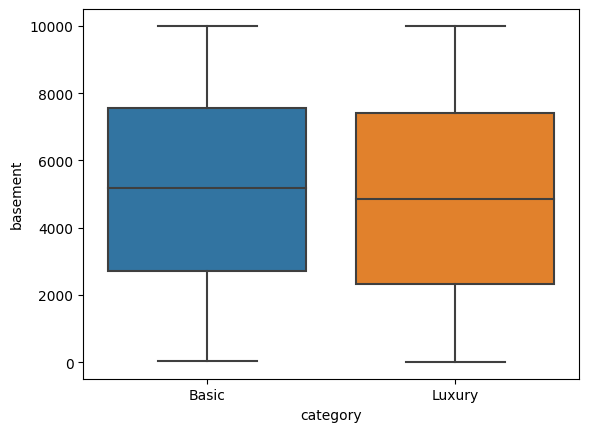

In [138]:
#visualisasi fitur menggunakan metode yang sudah dipelajari
# pebandingan median luas basement berdasarkan apakah rumahnya basic atau luxury
sns.boxplot(data=data, x="category", y="basement")

luas_basement_basic = data[data['category'] == 'Basic']['basement'].median()
luas_basement_luxury = data[data['category'] == 'Luxury']['basement'].median()

print("Median luas basement rumah basic: ", luas_basement_basic)
print("Median luas basement rumah luxury: ", luas_basement_luxury)

0


/tmp/ipykernel_158924/3104800616.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  luxury_new = data[data['category'] == 'Luxury'][data['isNewBuilt'] == 'Y'].shape[0]
/tmp/ipykernel_158924/3104800616.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  luxury_old = data[data['category'] == 'Luxury'][data['isNewBuilt'] == 'N'].shape[0]


([<matplotlib.patches.Wedge at 0x7f41316f1190>,
 [Text(-1.1, 1.3471114790620887e-16, 'Newly built'),
  Text(1.1, -2.6942229581241775e-16, 'Not newly built')],
 [Text(-0.6, 7.347880794884119e-17, '100.0%'),
  Text(0.6, -1.4695761589768238e-16, '0.0%')])

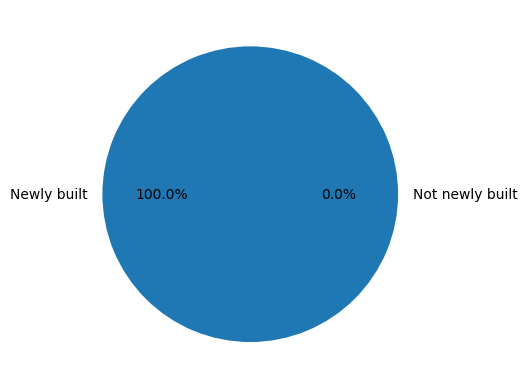

In [139]:
# komposisi jumlah rumah yang baru dibangun atau tidak pada rumah luxury
luxury_new = data[data['category'] == 'Luxury'][data['isNewBuilt'] == 'Y'].shape[0]
luxury_old = data[data['category'] == 'Luxury'][data['isNewBuilt'] == 'N'].shape[0]
print(luxury_old)

komposisi = [luxury_new, luxury_old]
label = ['Newly built', 'Not newly built']

plt.pie(komposisi, labels=label, autopct='%1.1f%%')

### Deskripsi Data Visualization
Berikan keterangan atau deskripsi singkat mengenai informasi yang diperoleh dari visualisasi data tersebut. Jawablah pertanyaan di atas pada cell markdown ini!

1. Perbandingan median luas basement rumahnya adalah basic memiliki luas basement yang lebih tinggi dibanding luxury. Dapat dilihat dalam box plot dan output median bahwa basic memiliki median 5170, sedangkan luxury hanya mempunyai median sebanyak 4847.5 .

2. Komposisi rumah luxury yang baru dibangun atau tidak, jika dilihat dalam plot maka dapat disimpulkan bahwa semua rumah bertipe luxury adalah rumah yang barusan dibangun (newly built).

### Data Cleansing

Bagian berikut berisi proses pembersihan data (jika diperlukan, minimal cek apakah ada data yang kosong atau duplikat). Drop feature yang berlaku sebagai unique identifier (CityCode) dan drop feature Price. Lakukan OneHotEncoder untuk data kategorik string. Pisahkan juga label dengan feature!

In [140]:
# detect row yang mengandung NaN
print(data.isnull().sum())
# tidak ada data yang null, tidak perlu untuk menghapus data

# drop kolom price
data = data.drop(['price'], axis=1)

cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
category             0
dtype: int64


In [141]:
# encode data dengan one hot encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

cat_cols = ['isNewBuilt', 'hasStormProtector', 'hasStorageRoom', 'category']

transformer = make_column_transformer((OneHotEncoder(), cat_cols), remainder='passthrough')

data_enc = transformer.fit_transform(data)

print(data_enc.shape)
print(transformer.get_feature_names_out())

data_enc = pd.DataFrame(data_enc, columns=transformer.get_feature_names_out())

(2000, 15)
['onehotencoder__isNewBuilt_N' 'onehotencoder__isNewBuilt_Y'
 'onehotencoder__hasStormProtector_N' 'onehotencoder__hasStormProtector_Y'
 'onehotencoder__hasStorageRoom_N' 'onehotencoder__hasStorageRoom_Y'
 'onehotencoder__category_Basic' 'onehotencoder__category_Luxury'
 'remainder__cityPartRange' 'remainder__numPrevOwners' 'remainder__made'
 'remainder__basement' 'remainder__attic' 'remainder__garage'
 'remainder__hasGuestRoom']


### Train-test split

> Untuk sub A: random_state train_test_split gunakan 2 digit terakhir NPM terbesar di sub kelompok  

> Untuk sub B: random_state train_test_split gunakan 2 digit terakhir NPM terkecil di sub kelompok 

In [142]:
#train-test split dan data scaling
from sklearn.model_selection import train_test_split

X = data_enc.drop(['onehotencoder__category_Basic', 'onehotencoder__category_Luxury'], axis=1)
y = data['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11) # npm 200710880 dan 210711011, diambil terbesar -> 210711011, diambil 2 digit terahir -> 11.

### Modelling

Gunakan Pipeline untuk modelling dan grid search cross-validation untuk pemilihan model terbaik. Gunakan Stratified K-fold Cross Validation dengan nilai n_splits=5. Pipeline terdiri atas data scaling, feature selection, dan classifier. Buatlah 2 Pipeline dan 2 GridSearchCV untuk masing-masing kombinasi berikut.

>Step data scaling untuk membandingkan perlunya data scaling atau tidak. Gunakan dua nilai pada parameter grid yaitu: [None,Scaler]. Untuk sub A: gunakan StandardScaler. Untuk sub B: gunakan MinMaxScaler

>Step feature selection untuk membandingkan metode feature selection yang digunakan. Gunakan dua metode pada parameter grid yaitu: [Selector]. Untuk sub A: gunakan SelectKBest dengan ketentuan k minimal 2, maksimal n-1. Untuk sub B: gunakan SelectPercentile dengan ketentuan persentil minimal 30%, maksimal 80%. Kalian juga perlu melakukan setting parameter grid nilai k atau percentile-nya.

>Step classifier untuk membandingkan algoritme classifier. Eksplorasi pengaturan parameter yang ada pada algoritme yang akan Anda gunakan, tidak terbatas pada 1-2 parameter saja supaya optimal (selain random_state). Silahkan bereksperimen untuk parameter seperti n_estimators, max_depth untuk tree-based classifier; C untuk Logistic Regression; dan C, gamma, serta kernel untuk SVM agar mendapat akurasi terbaik.

> Sub A: RandomForestClassifier(n_estimators=bebas minimal 50, random_state= dua digit terakhir NPM terbesar dalam sub kelompok, max_depth=bebas, criterion='entropy') dan LogisticRegression(C=bebas, max_iter=10000, class_weight='balanced')

> Sub B: K-Nearest Neighbors(n_neighbors=bebas, weights='distance') dan SVC(C=bebas, gamma=bebas, class_weight='balanced')

>Tampilkan best estimator dan nilai best score dari kedua grid-search cross-validation. Fit best estimator pada train set kemudian ujikan pada test set dengan fungsi score. Format score 3 digit di belakang koma (.3f).

In [143]:
#cell code ini untuk proses pembuatan model pipeline & grid search 1


In [144]:
#cell code ini untuk proses pembuatan model pipeline & grid search 2


### Evaluasi Model

Bagian berikut berisi evaluasi model menggunakan classification report dan skor AUC. Tampilkan classification report dan AUC dari best estimator yang diperoleh masing-masing grid search!

In [145]:
#lakukan proses evaluasi model algoritme pembelajaran mesin


## Kesimpulan

Silahkan jawab pertanyaan berikut:

1. Apa saja feature-feature yang penting untuk membedakan antara rumah basic dan luxury? 

2. Model apakah yang memiliki performa paling baik terhadap dataset? Apakah parameter setting yang paling optimal dari model tersebut?

*tulis jawaban Anda di cell ini*